____________
# Traffic Collision Data
## From the City of Seattle 
------------
# <b>EXPLORATORY DATA ANALYSIS</b>
------------

In [1]:
# Pandas Library & csv reading dataset
import pandas as pd
pd.set_option('display.max_columns', None)

filename = 'Data-Collisions_Cleanv2.csv'
df = pd.read_csv(filename,low_memory=False)
df_copy = df.copy()
print('--------------------------------------\n\033[1mDataset Dimensions:\033[0m:',df.shape)
print('\n--------------------------------------\n\033[1mAttributes and Formats:\033[0m\n',df.dtypes,'\n\n--------------------------------------\n')

--------------------------------------
Dataset Dimensions:: (194673, 33)

--------------------------------------
Attributes and Formats:
 SEVERITYCODE        int64
X                 float64
Y                 float64
ADDRTYPE           object
LOCATION           object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
COLLISIONVEH       object
DATE               object
DATE_YR             int64
DATE_MO             int64
TIME               object
TIMESTR            object
TIME_HR            object
WEATHER_V           int64
ROADCOND_V          int64
LIGHTCOND_V         int64
COLLISIONVEH_V      int64
dtyp

# TARGET VARIABLE AND MAIN FEATURES ARE CATEGORICAL 

--------------
## PLOTS ANALYSIS
___________

In [3]:
#from www.machinelearningplus.com
#!pip install brewer2mpl
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import folium
%matplotlib inline

# INITIAL TARGET VARIABLE - SEVERITY OF INCIDENT
--------------

-----------------------------
                                 value_counts
Incident_Severity                           
Injury Collision                       58188
Property Damage Only Collision        136485 
-----------------------------



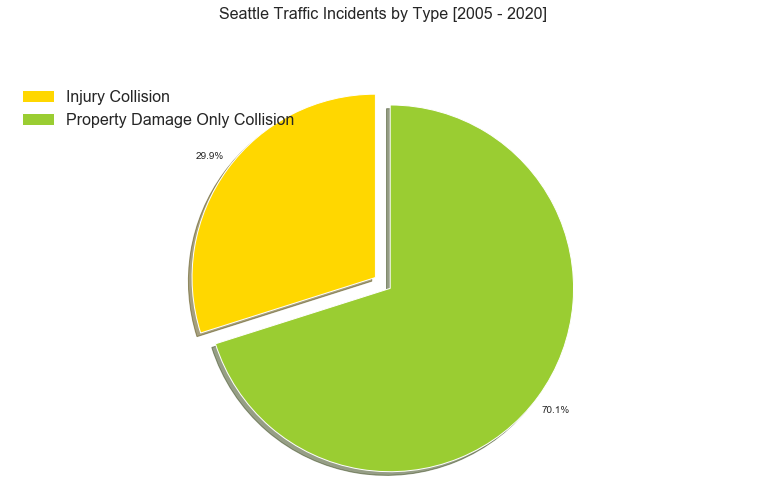

In [450]:
df_tmp = df[['SEVERITYDESC', 'ROADCOND']]
df_var = df_tmp.groupby('SEVERITYDESC').count()
df_var.rename(columns={'SEVERITYDESC': 'Incident_Severity'}, inplace=True)
df_var.rename(columns={'ROADCOND': 'value_counts'}, inplace=True)
df_var.index.name = 'Incident_Severity'
print('-----------------------------\n',df_var, '\n-----------------------------\n')

colors_list = ['gold', 'yellowgreen']
explode_list = [0.1, 0] # ratio for each continent with which to offset each wedge.

df_var['value_counts'].plot(kind='pie',
                            figsize=(11, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Seattle Traffic Incidents by Type [2005 - 2020]', y=1.12) 
plt.axis('equal') 
plt.tight_layout()
plt.ylabel("")

# add legend
plt.legend(labels=df_var.index, loc='upper left') 
plt.show()

______
# MAP OF TRAFFIC INCIDENTS in SEATTLE, WA (200 SAMPLES)
--------

In [456]:
# get the first 100 crimes in the df_incidents dataframe
limit = 200
df_xy = df.iloc[0:limit, :]
df_xy1 = df_xy.dropna(subset=['X', 'Y'])
# Seattle latitude and longitude values
latitude = 47.6
longitude = -122.3

# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_xy1.Y, df_xy1.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
seattle_map.add_child(incidents)

----------------
# KIND OF INCIDENT
-------------

-----------------------------
                              value_counts
Collision_Type                           
MOTOR ONLY                          14353
MOTOR – MOTOR                      158592
MOTOR – OTHER                         102
MOTOR – PEDALCYCLIST                 3426
MOTOR – PEDESTRIAN                   6526
PEDALCYCLIST ONLY                      96
PEDALCYCLIST – MOTOR                 1692
PEDALCYCLIST – PEDALCYCLIST            12
PEDALCYCLIST – PEDESTRIAN              75
Unknown                              9799 
-----------------------------



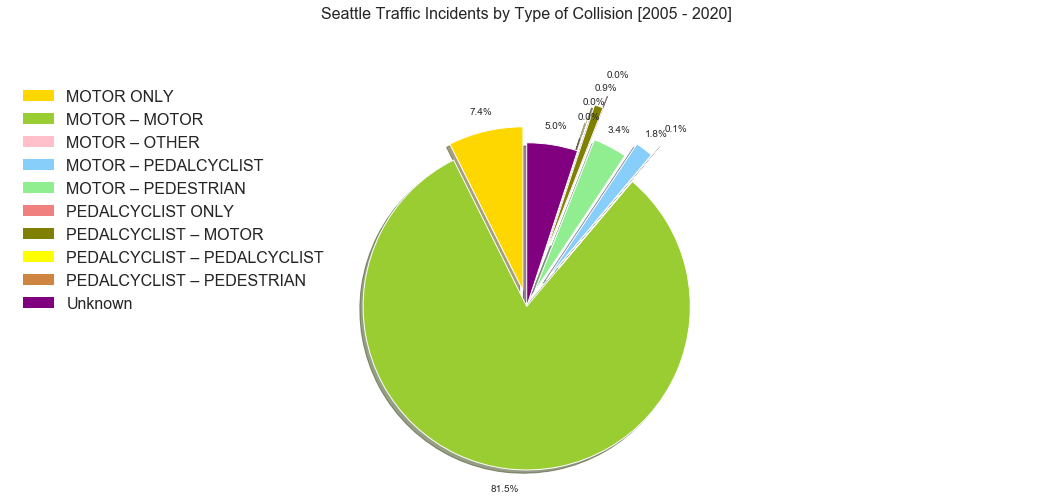

In [455]:
df_tmp = df[['SEVERITYCODE', 'COLLISIONVEH']]
df_var = df_tmp.groupby('COLLISIONVEH').count()
df_var.rename(columns={'COLLISIONVEH': 'Collision_Type'}, inplace=True)
df_var.rename(columns={'SEVERITYCODE': 'value_counts'}, inplace=True)
df_var.index.name = 'Collision_Type'
print('-----------------------------\n',df_var, '\n-----------------------------\n')

colors_list = ['gold', 'yellowgreen', 'pink', 'lightskyblue', 'lightgreen', 'lightcoral', 'olive', 'yellow', 'peru', 'purple']
explode_list = [0.1, 0, 0.3, 0.2, 0.1, 0.4,0.3,0.2,0.1,0] # ratio for each continent with which to offset each wedge.

df_var['value_counts'].plot(kind='pie',
                            figsize=(15, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Seattle Traffic Incidents by Type of Collision [2005 - 2020]', y=1.12) 
plt.axis('equal') 
plt.tight_layout()
plt.ylabel("")

# add legend
plt.legend(labels=df_var.index, loc='upper left') 
plt.show()

-------------
# INCIDENTS BY WEATHER CONDITION
-------------

-----------------------------
                 value_counts
Weather                     
Clear                 111135
Fog/Smog/Smoke           569
Other                   1031
Overcast               27714
Raining                33145
Snowing                  907
Unknown                20172 
-----------------------------



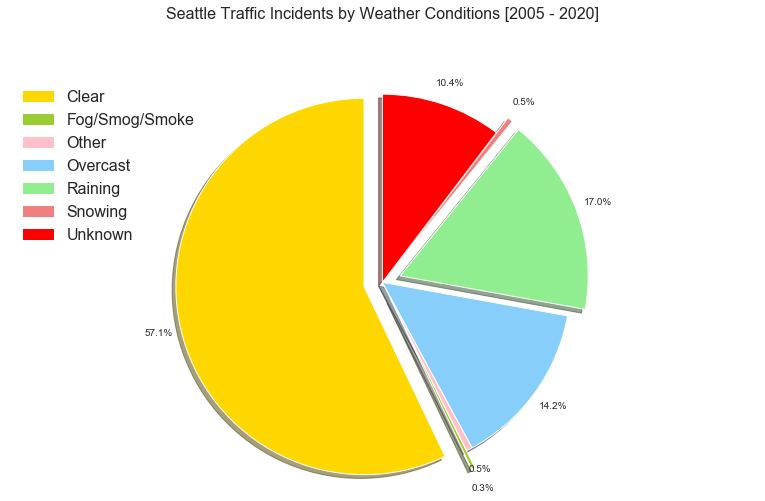

In [457]:
df_tmp = df[['SEVERITYCODE', 'WEATHER']]
df_weather = df_tmp.groupby('WEATHER').count()
df_weather.rename(columns={'SEVERITYCODE': 'value_counts'}, inplace=True)
df_weather.index.name = 'Weather'
print('-----------------------------\n',df_weather, '\n-----------------------------\n')

colors_list = ['gold', 'yellowgreen', 'pink', 'lightskyblue', 'lightgreen', 'lightcoral', 'red']
explode_list = [0.1, 0.1, 0, 0, 0.1, 0.1, 0] # ratio for each continent with which to offset each wedge.

df_weather['value_counts'].plot(kind='pie',
                            figsize=(11, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Seattle Traffic Incidents by Weather Conditions [2005 - 2020]', y=1.12) 
plt.axis('equal') 
plt.tight_layout()
plt.ylabel("")

# add legend
plt.legend(labels=df_weather.index, loc='upper left') 
plt.show()

-------------
# INCIDENTS BY ROAD CONDITIONS
-------------

-----------------------------
                 value_counts
Road_Condition              
Dry                   124510
Ice                     1209
Other                    386
Snow/Slush              1004
Unknown                20090
Wet                    47474 
-----------------------------



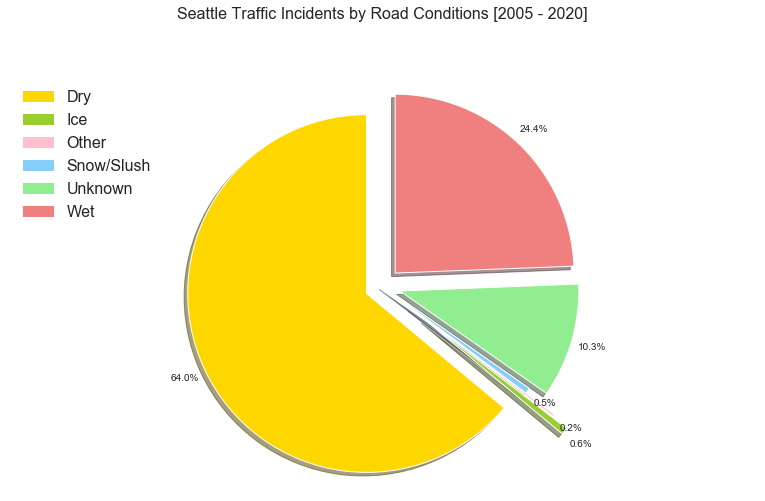

In [374]:
df_tmp = df[['SEVERITYCODE', 'ROADCOND']]
df_var = df_tmp.groupby('ROADCOND').count()
df_var.rename(columns={'ROADCOND': 'Road_Condition'}, inplace=True)
df_var.rename(columns={'SEVERITYCODE': 'value_counts'}, inplace=True)
df_var.index.name = 'Road_Condition'
print('-----------------------------\n',df_var, '\n-----------------------------\n')

colors_list = ['gold', 'yellowgreen', 'pink', 'lightskyblue', 'lightgreen', 'lightcoral']
explode_list = [0.1, 0.3, 0.2, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_var['value_counts'].plot(kind='pie',
                            figsize=(11, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Seattle Traffic Incidents by Road Conditions [2005 - 2020]', y=1.12) 
plt.axis('equal') 
plt.tight_layout()
plt.ylabel("")

# add legend
plt.legend(labels=df_var.index, loc='upper left') 
plt.show()

-------------
# INCIDENTS BY LIGHT CONDITIONS
-------------

-----------------------------
                           value_counts
Light_Condition                       
Dark - No Street Lights           1537
Dark - Street Lights Off          1199
Dark - Street Lights On          48507
Dawn                              2502
Daylight                        116137
Dusk                              5902
Other                              246
Unknown                          18643 
-----------------------------



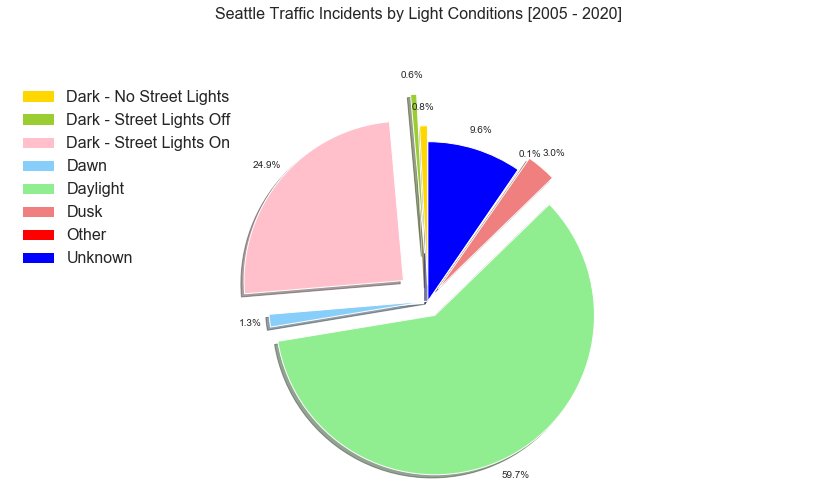

In [458]:
df_tmp = df[['SEVERITYCODE', 'LIGHTCOND']]
df_var = df_tmp.groupby('LIGHTCOND').count()
df_var.rename(columns={'LIGHTCOND': 'Light_Condition'}, inplace=True)
df_var.rename(columns={'SEVERITYCODE': 'value_counts'}, inplace=True)
df_var.index.name = 'Light_Condition'
print('-----------------------------\n',df_var, '\n-----------------------------\n')

colors_list = ['gold', 'yellowgreen', 'pink', 'lightskyblue', 'lightgreen', 'lightcoral', 'red', 'blue']
explode_list = [0.1, 0.3, 0.2, 0, 0.1, 0.1, 0, 0] # ratio for each continent with which to offset each wedge.

df_var['value_counts'].plot(kind='pie',
                            figsize=(12, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Seattle Traffic Incidents by Light Conditions [2005 - 2020]', y=1.12) 
plt.axis('equal') 
plt.tight_layout()
plt.ylabel("")

# add legend
plt.legend(labels=df_var.index, loc='upper left') 
plt.show()

-------------
# PIVOT PLOTS
-------------

# Weather - Road Conditions Pivot Table

-----------------------------
                value_counts                       
ROADCOND                Dry  Ice Snow/Slush    Wet
WEATHER                                           
Clear                106146  642         95   3599
Fog/Smog/Smoke          358   35          2    163
Overcast              16181  225        133  10750
Raining                 641   14         92  32212
Snowing                  24  169        548    155 
-----------------------------



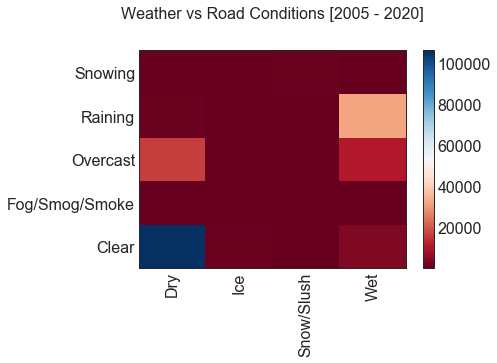

In [463]:
# Remove Unkown and Other from df
df1 = df.copy()
df1 = df1[(df1.WEATHER != 'Unknown') & (df1.WEATHER != 'Other')]
df1 = df1[(df1.ROADCOND != 'Unknown') & (df1.ROADCOND != 'Other')]
df1_tmp = df1[['SEVERITYCODE','WEATHER','ROADCOND']]
df1_grp = df1_tmp.groupby(['WEATHER','ROADCOND'],as_index=False).count()
df1_grp_pivot = df1_grp.pivot(index='WEATHER',columns='ROADCOND')
df1_grp_pivot.rename(columns={'SEVERITYCODE': 'value_counts'}, inplace=True)
print('-----------------------------\n',df1_grp_pivot, '\n-----------------------------\n')

fig, ax = plt.subplots()
im = ax.pcolor(df1_grp_pivot, cmap='RdBu')   #RdBu

#label names
row_labels = df1_grp_pivot.columns.levels[1]
col_labels = df1_grp_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df1_grp_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df1_grp_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.title('Weather vs Road Conditions [2005 - 2020]', y=1.12) 

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

-------
# Weather - Light Conditions Pivot Table

-----------------------------
                           value_counts                           \
LIGHTCOND      Dark - No Street Lights Dark - Street Lights Off   
WEATHER                                                           
Clear                              799                      585   
Fog/Smog/Smoke                      11                       17   
Overcast                           222                      198   
Raining                            377                      302   
Snowing                              9                       12   

                                                             
LIGHTCOND      Dark - Street Lights On  Dawn Daylight  Dusk  
WEATHER                                                      
Clear                            25471  1028    78223  3233  
Fog/Smog/Smoke                     287    36      203     6  
Overcast                          7545   653    17518  1137  
Raining                          13169   673    16882  1285 

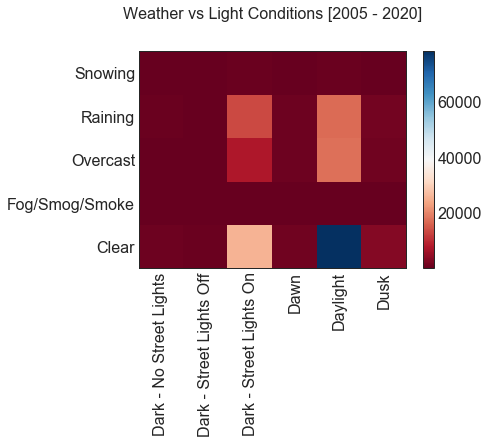

In [464]:
# Remove Unkown and Other from df
df2 = df.copy()
df2 = df2[(df2.WEATHER != 'Unknown') & (df2.WEATHER != 'Other')]
df2 = df2[(df2.LIGHTCOND != 'Unknown') & (df2.LIGHTCOND != 'Other')]
df2_tmp = df2[['SEVERITYCODE','WEATHER','LIGHTCOND']]
df2_grp = df2_tmp.groupby(['WEATHER','LIGHTCOND'],as_index=False).count()
df2_grp_pivot = df2_grp.pivot(index='WEATHER',columns='LIGHTCOND')
df2_grp_pivot.rename(columns={'SEVERITYCODE': 'value_counts'}, inplace=True)
print('-----------------------------\n',df2_grp_pivot, '\n-----------------------------\n')
fig, ax = plt.subplots()
im = ax.pcolor(df2_grp_pivot, cmap='RdBu')   #RdBu

#label names
row_labels = df2_grp_pivot.columns.levels[1]
col_labels = df2_grp_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df2_grp_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df2_grp_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.title('Weather vs Light Conditions [2005 - 2020]', y=1.12) 

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

-----------
# CORRELATION AND CAUSALITY
-----------

### DESCRIPTIVE STATISTICS FOR MAIN FEATURES

In [9]:
df[['SEVERITYCODE','WEATHER_V','ROADCOND_V','LIGHTCOND_V','COLLISIONVEH_V']].describe()

,SEVERITYCODE,WEATHER_V,ROADCOND_V,LIGHTCOND_V,COLLISIONVEH_V
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,2.766655,2.657770,4.758888,2.513744
std,0.457778,2.180658,2.249488,1.424933,1.910549
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,3.000000,2.000000
50%,1.000000,1.000000,1.000000,5.000000,2.000000
75%,2.000000,5.000000,5.000000,5.000000,2.000000
max,2.000000,7.000000,6.000000,8.000000,10.000000


### CORRELATIONS

In [11]:
df[['SEVERITYCODE','WEATHER_V','ROADCOND_V','LIGHTCOND_V','COLLISIONVEH_V']].corr()

,SEVERITYCODE,WEATHER_V,ROADCOND_V,LIGHTCOND_V,COLLISIONVEH_V
SEVERITYCODE,1.000000,-0.098178,-0.047077,-0.085736,0.022391
WEATHER_V,-0.098178,1.000000,0.761901,0.316668,0.190316
ROADCOND_V,-0.047077,0.761901,1.000000,0.107981,0.094841
LIGHTCOND_V,-0.085736,0.316668,0.107981,1.000000,0.222931
COLLISIONVEH_V,0.022391,0.190316,0.094841,0.222931,1.000000


### P-VALUES
By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [17]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['WEATHER_V'], df['SEVERITYCODE'])
print('--------------------------------------\nThe Pearson Correlation Coefficient for \033[1mWEATHER - SEVERITY\033[0m is', pearson_coef, ' with a P-value of P =', p_value) 

pearson_coef, p_value = stats.pearsonr(df['ROADCOND_V'], df['SEVERITYCODE'])
print('--------------------------------------\nThe Pearson Correlation Coefficient for \033[1mROAD_COND - SEVERITY\033[0m is', pearson_coef, ' with a P-value of P =', p_value) 

pearson_coef, p_value = stats.pearsonr(df['LIGHTCOND_V'], df['SEVERITYCODE'])
print('--------------------------------------\nThe Pearson Correlation Coefficient for \033[1mLIGHT_COND - SEVERITY\033[0m is', pearson_coef, ' with a P-value of P =', p_value) 
print('--------------------------------------\n')


--------------------------------------
The Pearson Correlation Coefficient for WEATHER - SEVERITY is -0.0981776164420398  with a P-value of P = 0.0
--------------------------------------
The Pearson Correlation Coefficient for ROAD_COND - SEVERITY is -0.04707671447081473  with a P-value of P = 6.237223358485522e-96
--------------------------------------
The Pearson Correlation Coefficient for LIGHT_COND - SEVERITY is -0.0857358855781698  with a P-value of P = 2.804407818e-314
--------------------------------------



----------
# FINAL SELECTED ATTRIBUTES FOR ANALYSIS     
----------     
<div class="alert alert-block alert-info" style="margin-top: 20px">

**TARGET ATTRIBUTE:**     
<b>SEVERITYCODE :</b> 2: Injury / 1:Property Damage, <b>Categorical Variable</b>        

---------------
**ATTRIBUTES TO BE USED (FEATURES):**      
<b>WEATHER_V    :</b> Weather Condition (Overcast, Rainy, Clear, etc), <b>Numerical Variable</b>        
<b>ROADCOND_V   :</b> Wet / Dry, <b>Numerical Variable</b>       
<b>LIGHTCOND_V  :</b> Daylight, Dark, Dark Street Lights on, Dark No street lights, etc), <b>Numerical Variable</b>       
<b>COLLISIONVEH_V :</b> Collision vehicles involved, <b>Numerical Variable</b>

</div>

----------
**OTHER ATTRIBUTES:**     
**PERSONCOUNT  :** # People involved        
<b>PEDCOUNT     :</b> # Pedestrians involved        
<b>PEDCYLCOUNT  :</b> # cyclists involved        
<b>VEHCOUNT     :</b> # Vehicles involved        
<b>DATE_YR      :</b> Incident Date Year, <b>Categorical Variable</b>       
<b>DATE_MO      :</b> Incident Date Month of Year, <b>Categorical Variable</b>      
<b>TIME_HR      :</b> Incident Time Hour of day, <b>Categorical Variable</b>      
<b>WEATHER      :</b> Weather Condition (Overcast, Rainy, Clear, etc), <b>Categorical Variable</b>        
<b>ROADCOND     :</b> Wet / Dry, <b>Categorical Variable</b>       
<b>LIGHTCOND    :</b> Daylight, Dark, Dark Street Lights on, Dark No street lights, etc), <b>Categorical Variable</b>        
<b>SPEEDING     :</b> Y/N, <b>Categorical Variable</b>        
<b>COLLISIONVEH :</b> Collision vehicles involved, <b>Categorical Variable</b> 
